# K Nearest Neighbors Project 

Welcome to the KNN Project!
## Import Libraries
**Import pandas,seaborn, and the usual libraries.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read the 'KNN_Project_Data csv file into a dataframe**

In [2]:
df = pd.read_csv('KNN_Project_Data')

**Check the dataframe.**

In [3]:
df

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
...,...,...,...,...,...,...,...,...,...,...,...
995,1343.060600,1289.142057,407.307449,567.564764,1000.953905,919.602401,485.269059,668.007397,1124.772996,2127.628290,0
996,938.847057,1142.884331,2096.064295,483.242220,522.755771,1703.169782,2007.548635,533.514816,379.264597,567.200545,1
997,921.994822,607.996901,2065.482529,497.107790,457.430427,1577.506205,1659.197738,186.854577,978.340107,1943.304912,1
998,1157.069348,602.749160,1548.809995,646.809528,1335.737820,1455.504390,2788.366441,552.388107,1264.818079,1331.879020,1


# EDA (Exploratory Data Analysis)

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

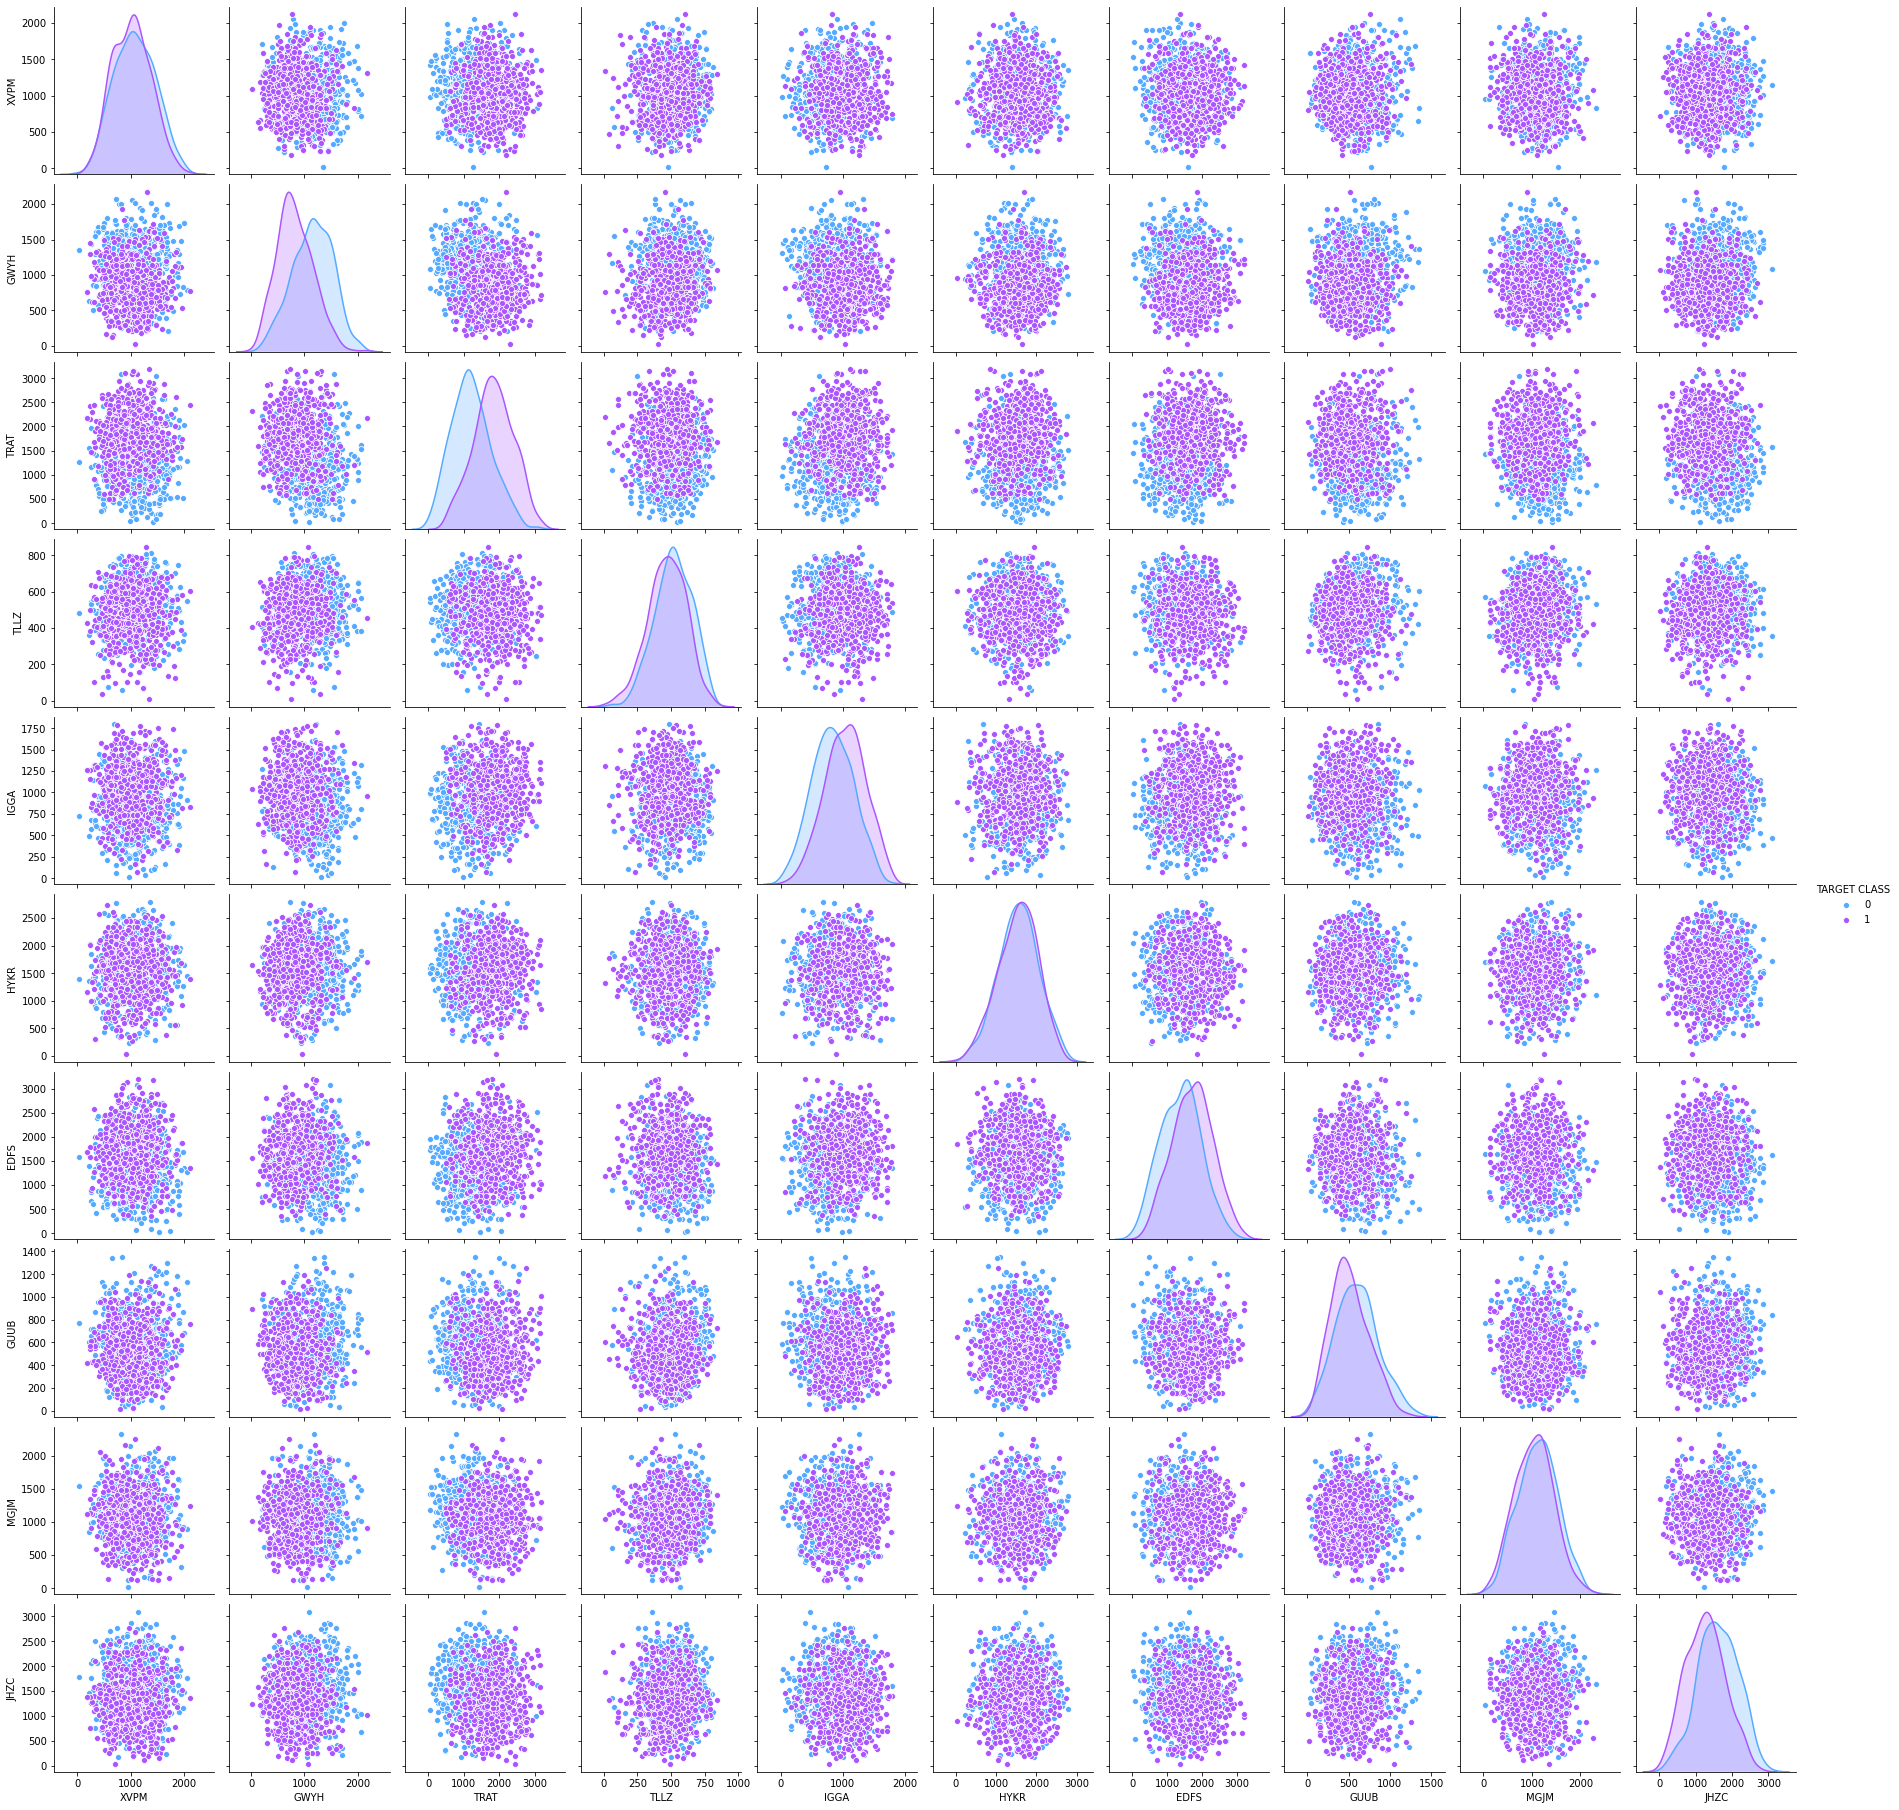

In [4]:
# THIS IS GOING TO BE A VERY LARGE PLOT
sns.pairplot(df,hue='TARGET CLASS',palette='cool')

# Standardize the Variables

Time to standardize the variables.

**Import StandardScaler from Scikit learn.**

In [5]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [6]:
scaler = StandardScaler()

**Fit scaler to the features.**

In [7]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [8]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [9]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Define Feature matrix
# Dimension : (1000x10)
X = df_feat

In [12]:
# Define Output vector
# Dimension : (1000x1)
y = df['TARGET CLASS']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [14]:
# Training feature matrix
# Dimension : (700x10)
X_train

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
290,-2.174752,-0.018554,-0.079399,0.982093,-0.321720,-1.130540,-1.106023,0.194763,-0.452992,-0.322474
167,0.569587,-1.689740,0.257413,0.430801,1.234619,-0.092057,0.926614,-0.222843,0.294700,1.333316
486,0.509422,-1.169816,0.272174,-0.748102,-0.376545,-1.310755,1.196297,-1.539157,-0.498940,-0.657784
683,0.489994,0.386086,0.189835,0.382034,-1.976215,1.200304,1.800290,0.651946,1.203692,-0.173654
876,-0.020449,-0.412586,1.444908,0.330387,0.656949,0.299770,0.507379,-0.568271,-0.061135,-2.217078
...,...,...,...,...,...,...,...,...,...,...
575,1.286740,0.062053,-0.705295,-2.079875,-1.449433,-0.799082,1.873326,0.686651,0.346299,-1.130251
838,1.056628,2.176742,1.173371,0.141676,-0.375129,0.106478,-0.842854,1.996686,-1.531655,0.001460
337,0.935842,0.552590,-1.372636,0.378254,0.916928,0.365400,-1.347375,-0.853849,0.899254,1.316637
523,-1.073616,0.300187,-1.536335,0.585133,-0.529769,-1.570165,-0.692331,-0.914993,0.394708,-0.117782


In [15]:
# Training output vector
# Dimension : (700x1)
y_train

290    1
167    1
486    1
683    1
876    1
      ..
575    1
838    0
337    0
523    0
863    1
Name: TARGET CLASS, Length: 700, dtype: int64

In [16]:
# Test feature matrix
# Dimension : (300x10)
X_test

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
545,0.243786,-0.599657,1.924813,-0.090185,0.772421,-0.895233,1.479259,-0.298195,-0.401863,-1.296124
298,1.747583,-1.221593,-0.952874,-2.510832,0.854841,-0.579728,0.457152,1.344598,0.598795,0.508832
109,0.904496,0.087078,-2.071814,-1.640502,-0.691600,1.463442,0.158673,0.279232,0.154550,-0.222792
837,0.114053,-1.473391,1.074731,-1.380181,-1.070043,-1.783643,0.818014,-0.662259,-0.185789,0.240667
194,0.509278,0.372327,-0.162185,-1.586054,-0.285094,-2.112736,-0.639152,-1.586716,-1.020200,0.558123
...,...,...,...,...,...,...,...,...,...,...
847,-1.428000,-0.081689,-0.840369,0.110726,0.039910,-0.058568,1.499544,-0.589061,-1.074613,-0.364681
682,-1.181274,-1.595935,-0.635725,1.027217,0.302116,-0.027573,-0.300973,1.587533,0.644500,0.731266
884,0.897629,0.504203,0.167427,1.526383,-1.869491,-0.374559,0.723769,2.067418,1.139497,-0.503969
325,0.031510,0.077513,0.835837,1.780547,-0.105726,1.668595,-0.948474,1.228552,-0.415257,-0.099650


In [17]:
# Test output vector
# Dimension : (300x1)
y_test

545    1
298    1
109    0
837    1
194    0
      ..
847    1
682    1
884    0
325    0
482    0
Name: TARGET CLASS, Length: 300, dtype: int64

In [18]:
##### Dimensions #####
# df = (1000x11)
# X_train = (700x10)
# y_train = (700x1)
# X_test = (300x10)
# y_test = (300x1)

# Using KNN

Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. We'll start with k=1. We using the **"Elbow"** method for choosing the K's value.

**Import KNeighborsClassifier from scikit learn.**

In [19]:
from sklearn.neighbors import KNeighborsClassifier

**Create a KNN model instance with n_neighbors=1**

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [22]:
# Now make predictions with our test data (X_test)
pred = knn.predict(X_test)

In [23]:
pred

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0])

**Create a confusion matrix and classification report.**

In [24]:
# Import the model for classification_report and confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
# Print confusion matrix with 'y_test' and 'pred'
print(confusion_matrix(y_test, pred))

[[109  43]
 [ 41 107]]


In [26]:
# Print classification report with 'y_test' and 'pred'
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [27]:
# Define an empty list to stroring error rates for different values of K.
error_rate = []

# Use a loop for differnt values of K in a range.
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i) # Call KNN Classifier for different values of K.
    knn.fit(X_train,y_train) # Train our model with training data (X_train, y_train).
    pred_i = knn.predict(X_test) # Make predictions with test data (X_test) for different values of K.
    error_rate.append(np.mean(pred_i != y_test)) # Calculate the error rate and append to the list.

In [28]:
error_rate

[0.28,
 0.29,
 0.21666666666666667,
 0.22,
 0.20666666666666667,
 0.21,
 0.18333333333333332,
 0.19,
 0.19,
 0.17666666666666667,
 0.18333333333333332,
 0.18333333333333332,
 0.18333333333333332,
 0.18,
 0.18,
 0.18,
 0.17,
 0.17333333333333334,
 0.17666666666666667,
 0.18333333333333332,
 0.17666666666666667,
 0.18333333333333332,
 0.16666666666666666,
 0.18,
 0.16666666666666666,
 0.17,
 0.16666666666666666,
 0.17333333333333334,
 0.16666666666666666,
 0.17333333333333334,
 0.16,
 0.16666666666666666,
 0.17333333333333334,
 0.17333333333333334,
 0.17,
 0.16666666666666666,
 0.16,
 0.16333333333333333,
 0.16,
 0.17,
 0.16666666666666666,
 0.16666666666666666,
 0.16333333333333333,
 0.17333333333333334,
 0.16666666666666666,
 0.16666666666666666,
 0.17,
 0.16666666666666666,
 0.17333333333333334,
 0.16666666666666666]

**Now create the following plot using the information from your for loop.**

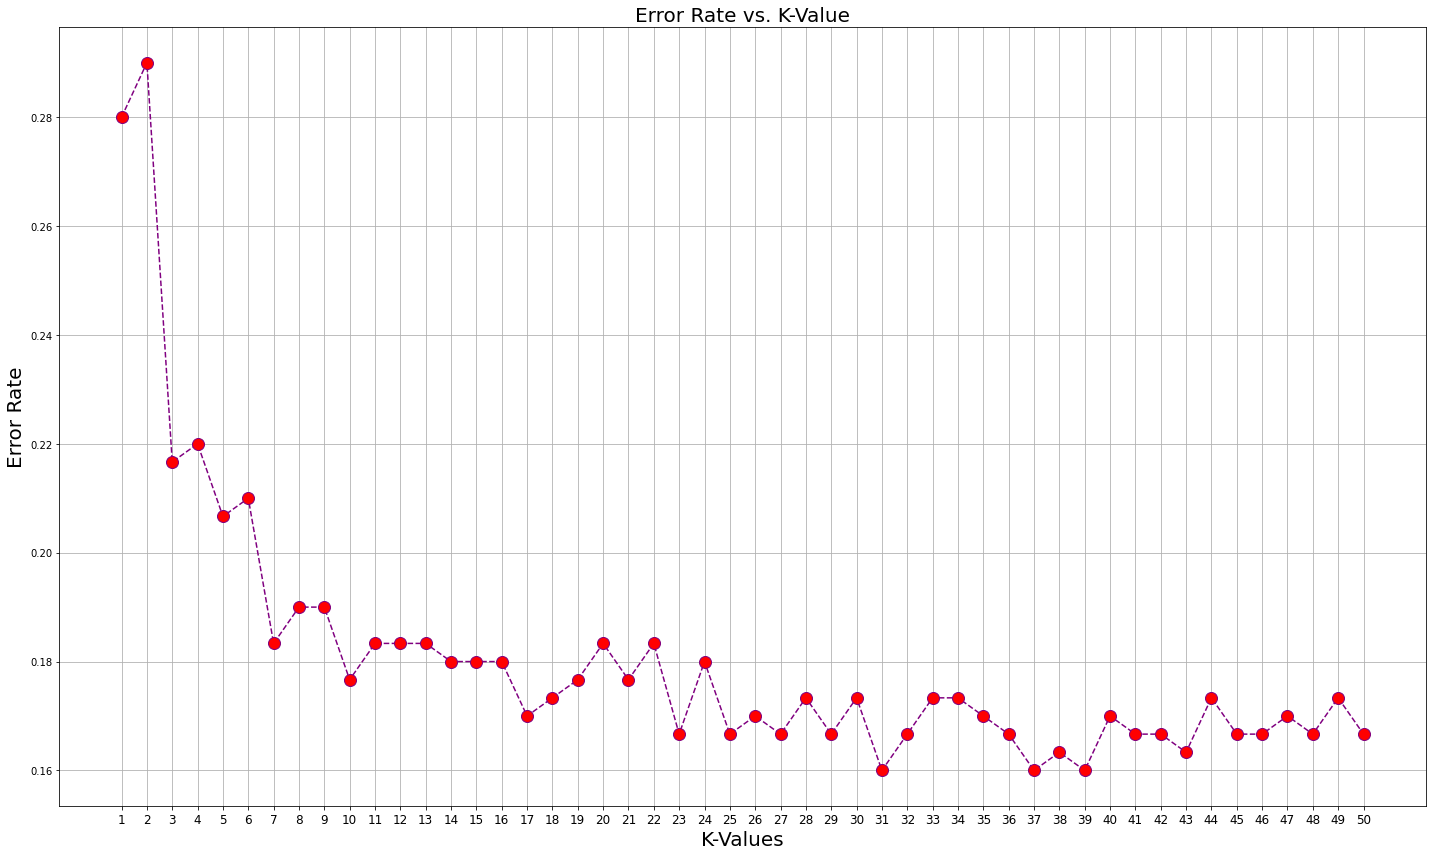

In [29]:
# Plot a figure: range(1,51) VS error_rate

plt.figure(figsize=(20,12))
plt.plot(range(1,51),error_rate,color='purple', linestyle='dashed', marker='o',markerfacecolor='red', markersize=12)
plt.xticks(range(1,51), size=12)
plt.title('Error Rate vs. K-Value', size=20)
plt.xlabel('K-Values', size=20)
plt.ylabel('Error Rate', size=20)
plt.grid()
plt.tight_layout()

### Copare some of the best error rates from above graph

In [30]:
print("For K = 31, error_rate is = ", error_rate[30])
print("For K = 37, error_rate is = ", error_rate[36])
print("For K = 39, error_rate is = ", error_rate[38])

For K = 31, error_rate is =  0.16
For K = 37, error_rate is =  0.16
For K = 39, error_rate is =  0.16


**Although, error_rate at K=31, K=37 and K=39 are least and same but, we choose lesser value of K, so it will be less time consuming**

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [31]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\nConfusion Matrix :\n')
print(confusion_matrix(y_test,pred))
print('\nClassification Report :\n')
print(classification_report(y_test,pred))

WITH K=1

Confusion Matrix :

[[109  43]
 [ 41 107]]

Classification Report :

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



**Model accuracy = 72%**

In [32]:
# NOW CHECK FOR K=31

knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=31')
print('\nConfusion Matrix :\n')
print(confusion_matrix(y_test,pred))
print('\nClassification Report :\n')
print(classification_report(y_test,pred))

WITH K=31

Confusion Matrix :

[[123  29]
 [ 19 129]]

Classification Report :

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



**Now our model is 84% accurate.**

# Great Job!